frame #1 received!


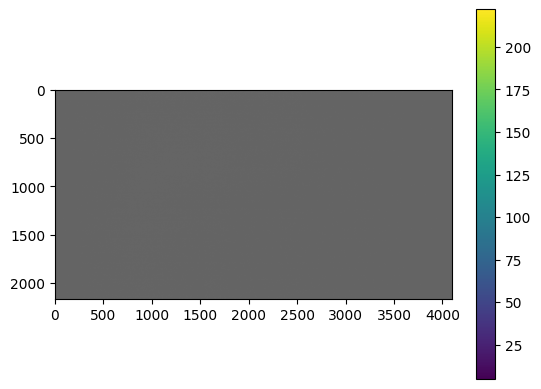

program completed


In [1]:
import numpy as np
import os
from thorlabs_tsi_sdk.tl_camera import TLCameraSDK, OPERATION_MODE
import matplotlib.pyplot as plt
s = 0
NUM_FRAMES = 10  # adjust to the desired number of frames
os.add_dll_directory(os.path.abspath('./imswitch/imcontrol/model/interfaces/thorlabs_tsi_sdk/dll/')) # add the location of the SDK DLLs to the PATH

with TLCameraSDK() as sdk:
    available_cameras = sdk.discover_available_cameras()
    if len(available_cameras) < 1:
        print("no cameras detected")
    sdk.open_camera(available_cameras[0])
    with sdk.open_camera(available_cameras[0]) as camera:
        camera.exposure_time_us = 10000  # set exposure to 11 ms
        camera.frames_per_trigger_zero_for_unlimited = 0  # start camera in continuous mode
        camera.image_poll_timeout_ms = 1000  # 1 second polling timeout

        camera.arm(2)

        camera.issue_software_trigger()

        frame = camera.get_pending_frame_or_null()
        if frame is not None:
            print("frame #{} received!".format(frame.frame_count))
            frame.image_buffer
            image_buffer_copy = np.copy(frame.image_buffer)
            numpy_shaped_image = image_buffer_copy.reshape(camera.image_height_pixels, camera.image_width_pixels)
            nd_image_array = np.full((camera.image_height_pixels, camera.image_width_pixels, 3), 0, dtype=np.uint8)
            nd_image_array[:,:,0] = numpy_shaped_image
            nd_image_array[:,:,1] = numpy_shaped_image
            nd_image_array[:,:,2] = numpy_shaped_image
            
            s = nd_image_array
            plt.imshow(s), plt.colorbar(), plt.show()
        else:
            print("Unable to acquire image, program exiting...")
            exit()
            
        
        camera.disarm()

#  Because we are using the 'with' statement context-manager, disposal has been taken care of.

print("program completed")